## Развлекательное приложение Procrastinate Pro+

### Обзор и предобработка данных

**Импортируем нужные библиотеки, загрузим данные и преобразуем значения в столбцах.**

In [1]:
# Загружаем необходимые библиотеки

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt



In [2]:
# Читаем данные
try:
    visits, orders, costs = (
    pd.read_csv('datasets/visits_info_short.csv'),  # журнал посещений
    pd.read_csv('datasets/orders_info_short.csv'),  # заказы
    pd.read_csv('datasets/costs_info_short.csv'),  # траты на рекламу
    )
except:
    visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    )

In [3]:
# обзор данных

visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
# сводная информация о данных

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В ходе общего обзора выявлено, что названия колонок не соответствуют принятым нормам.  
Тип данных в колонках связанных с датой требует исправления.  
Пропусков в данных не обнаружено.

In [9]:
# преобразуем названия колонок в нижний регистр и переименуем их
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [10]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'], format='%Y-%m-%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'], format='%Y-%m-%d %H:%M:%S')
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format='%Y-%m-%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Добавим в данные с расходами на рекламу столбцы с номерами недель и месяцев

In [11]:
# добавим столбец с номером недели
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

# добавим столбец с номером месяца
costs['month'] = pd.to_datetime(costs['dt']).dt.month

In [12]:
display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
 3   week     1800 non-null   UInt32 
 4   month    1800 non-null   int64  
dtypes: UInt32(1), float64(1), int64(1), object(2)
memory usage: 65.2+ KB


In [13]:
print(f'visits.duplicated: {visits.duplicated().sum()}, ')
print(f'orders.duplicated: {orders.duplicated().sum()}, ')
print(f'costs.duplicated: {costs.duplicated().sum()}')

visits.duplicated: 0, 
orders.duplicated: 0, 
costs.duplicated: 0


**Проверим данные в таблице посещений**

In [14]:
# Миинимальные и максимальные значения 'user_id'
display(visits['user_id'].min())
visits['user_id'].max()

599326

999999563947

In [15]:
# Самая ранняя и самая поздняя сессии в таблице visits
display(visits['session_start'].min())
visits['session_start'].max()

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-31 23:59:23')

In [16]:
# Проверим дельту сессий для подтверждения, что время начала сессии раньше времени конца сессии
(visits['session_end'] - visits['session_start'] < timedelta(0)).value_counts()

False    309901
dtype: int64

интервалы сессий в порядке

In [17]:
# Уникальные значения в cтолбце 'region'
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [18]:
# Уникальные значения в cтолбце 'device'
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [19]:
# Уникальные значения в cтолбце 'channel'
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

**Проверим данные в таблице заказов**

In [20]:
# Миинимальные и максимальные значения 'user_id'
display(visits['user_id'].min())
visits['user_id'].max()

599326

999999563947

In [21]:
# Самая ранняя и самая поздняя даты
display(orders['event_dt'].min())
orders['event_dt'].max()

Timestamp('2019-05-01 00:28:11')

Timestamp('2019-10-31 23:56:56')

In [22]:
# Миинимальные и максимальные значения 'revenue'
display(orders['revenue'].min())
orders['revenue'].max()

4.99

49.99

**Проверим данные в таблице рекламных расходов**

In [23]:
# Самая ранняя и самая поздняя даты
display(costs['dt'].min())
costs['dt'].max()

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

In [24]:
# Уникальные значения в cтолбце 'channel'
costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

In [25]:
# Миинимальные и максимальные значения 'costs'
display(costs['costs'].min())
costs['costs'].max()

0.8

630.0

#### **Вывод**
В ходе предварительного обзора данных были исправлены названия колонок и изменен тип данных в колонках с датами. Также, мы добавили в данные с расходами на рекламу столбцы с номерами недель и месяцев. Самая поздняя дата начала сессий, а также самая поздняя дата покупок - 31 октября 2019г, что превышает на 4 дня заявленную в описании к данным дату. Эта небольшая разница не повлияет на результат нашего анализа. Пропусков и дубликатов записей не обнаружено.

### Задание функций для расчёта LTV, ROI, удержания и конверсии.

#### Функции для вычисления значений метрик

In [26]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [27]:
# функция для расчёта Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [28]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [29]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков

In [30]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [31]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [32]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [33]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)

    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)

    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### **Вывод**
Были добавлены функции для расчёта и визуализации LTV, ROI, удержания и конверсии.

### Исследовательский анализ данных

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [34]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [35]:
# минимальная дата привлечения пользователей

min_dt = profiles['dt'].min()
print(f'Минимальная дата привлечения пользователей:  {min_dt}')

Минимальная дата привлечения пользователей:  2019-05-01


In [36]:
# максимальная дата привлечения поьлзователей

max_dt = profiles['dt'].max()
print(f'Максиамльная дата привлечения пользователей:  {max_dt}')

Максиамльная дата привлечения пользователей:  2019-10-27


Мы получили профили пользователей, которые понадобятся нам для дальнейшей работы. Минимальная и максимальная даты привлечения пользователей соответствуют заявленному диапазону в ТЗ.

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

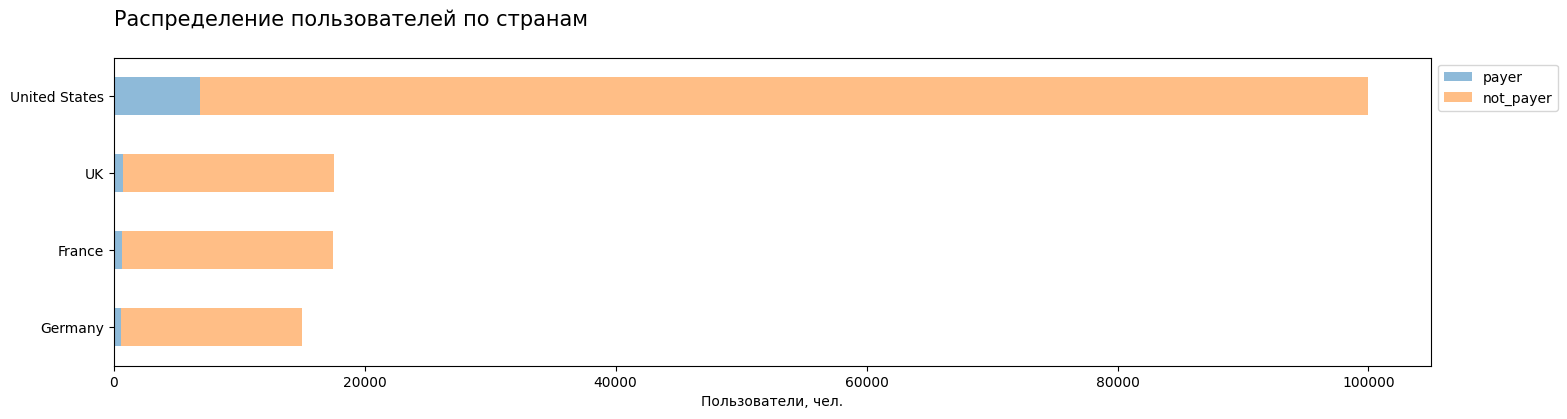

payer,not_payer,payer,payer_%
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


In [37]:
# построим таблицу
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer')
          )
region['payer_%'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)

# построим диаграмму
fig, ax = plt.subplots(figsize=(17, 4))
region[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Пользователи, чел.')
ax.set_ylabel('')
ax.set_title('Распределение пользователей по странам' + "\n", fontsize=15,loc='left')
plt.show()
region.sort_values(by='payer',ascending=False)

 В приложение 'Procrastinate Pro+' пользователи приходят из четырёх стран: США, Великобритании, Франции и Германии. Наибольшее число платящих пользователей приходится на США, наименьшее на Германию. Доля платящих пользователей к неплатящим также выше у США, а самая низкая - у Франции.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

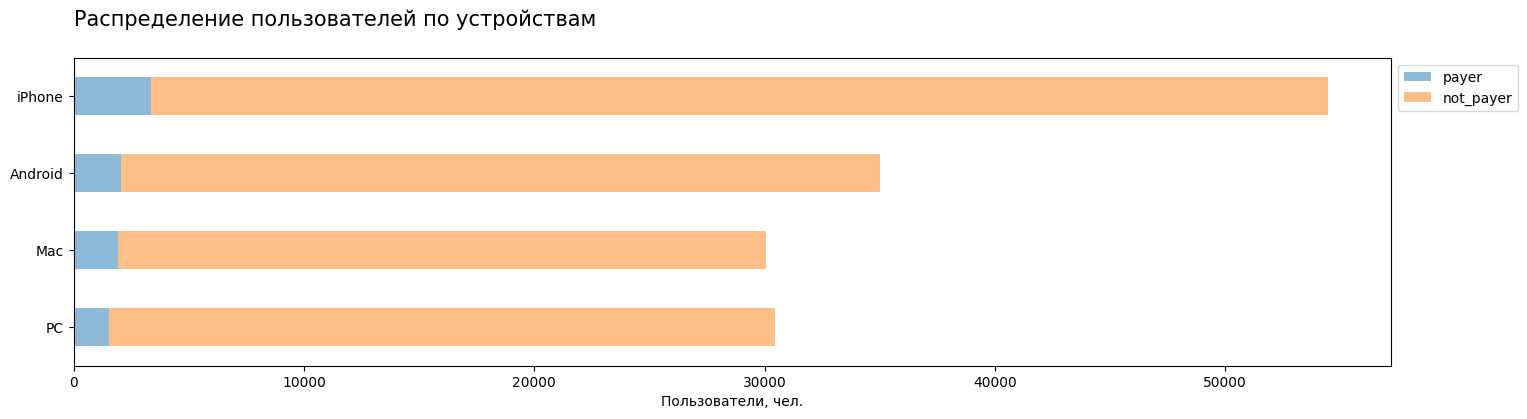

payer,not_payer,payer,payer_%
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
Mac,28130,1912,6.36
PC,28918,1537,5.05


In [38]:
# построим таблицу
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer')
          )
device['payer_%'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)

# построим диаграмму
fig, ax = plt.subplots(figsize=(17, 4))
device[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Пользователи, чел.')
ax.set_ylabel('')
ax.set_title('Распределение пользователей по устройствам' + "\n", fontsize=15,loc='left')
plt.show()
device.sort_values(by='payer',ascending=False)

В приложение 'Procrastinate Pro+' пользователи предпочитают заходить cо следующих устройств: iPhone, устройства на базе Android, Mac и PC. Наибольшее число платящих пользователей используют iPhone, на втором месте устройства на базе Android. Среди неплатящих лидером является Mac.

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

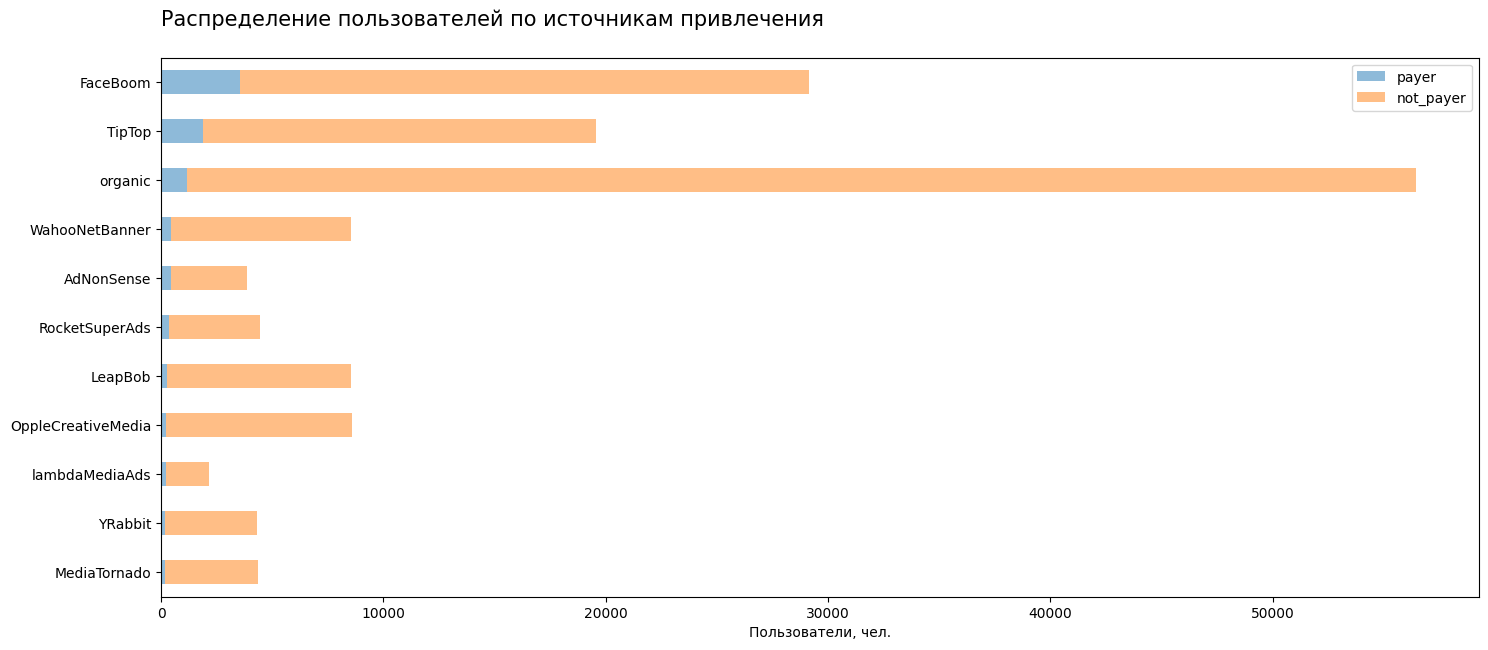

payer,not_payer,payer,payer_%
channel,,,
FaceBoom,25587,3557,12.20
TipTop,17683,1878,9.60
organic,55279,1160,2.06
WahooNetBanner,8100,453,5.30
AdNonSense,3440,440,11.34
RocketSuperAds,4096,352,7.91
LeapBob,8291,262,3.06
OppleCreativeMedia,8372,233,2.71
lambdaMediaAds,1924,225,10.47


In [39]:
# построим таблицу
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer')
          )
channel['payer_%'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)

# построим диаграмму
fig, ax = plt.subplots(figsize=(17, 7))
channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Пользователи, чел.')
ax.set_ylabel('')
ax.set_title('Распределение пользователей по источникам привлечения' + "\n", fontsize=15,loc='left')
plt.show()
channel.sort_values(by='payer',ascending=False)

Тройка лидеров по рекламным источникам из которых приходит больше всего платящих пользователей: FaceBoom, TipTop, WahooNetBanner, нименьшее у MediaTornado. По соотношение долей платящих к неплатящим пользователям лидерами являются: FaceBoom, AdNonSense, lambdaMediaAds. Стоит отметить большое число 'organic' пользователей, т.е. тех, кто пришёл в приложение не через рекламные источники. Несмотря на то, что доля платящих пользоватлей этого источника самая низкая, тем не менее это важный показатель.

#### **Вывод**  
Пользователи приложения 'Procrastinate Pro+' поступают из четырех стран: США, Великобритании, Франции и Германии. США имеют наибольшее количество платящих пользователей, в то время как в Германии оно наименьшее. Соотношение платящих к неплатящим также выше в США и наименьшее во Франции.
Относительно используемых устройств в приложении, предпочтение отдается iPhone, устройствам на базе Android (мобильные устройства), а также Mac и PC. Среди платящих пользователей iPhone занимает лидирующую позицию, за ним следуют устройства на базе Android. Среди неплатящих пользователей наиболее популярен Mac.
По источникам привлечения FaceBoom, TipTop и WahooNetBanner являются тремя наиболее прибыльными источниками, привлекающими платящих пользователей. С другой стороны, MediaTornado привлекает наименьшее количество платящих пользователей. Что касается соотношения платящих к неплатящим пользователям, FaceBoom, AdNonSense и lambdaMediaAds лидируют в этом показателе.


### Маркетинговое исследование

In [40]:
# organic пользователи не относятся к рекламным источникам, поэтому исключим их из дальнейшего анализа
profiles = profiles.loc[profiles['channel'] != 'organic']

#### Посчитаем общую сумму расходов на маркетинг

In [41]:
print(f'Общая сумма расходов на меркетинг: {costs.costs.sum():,.2f}')

Общая сумма расходов на меркетинг: 105,497.30


#### Выясним, как траты распределены по рекламным источникам.

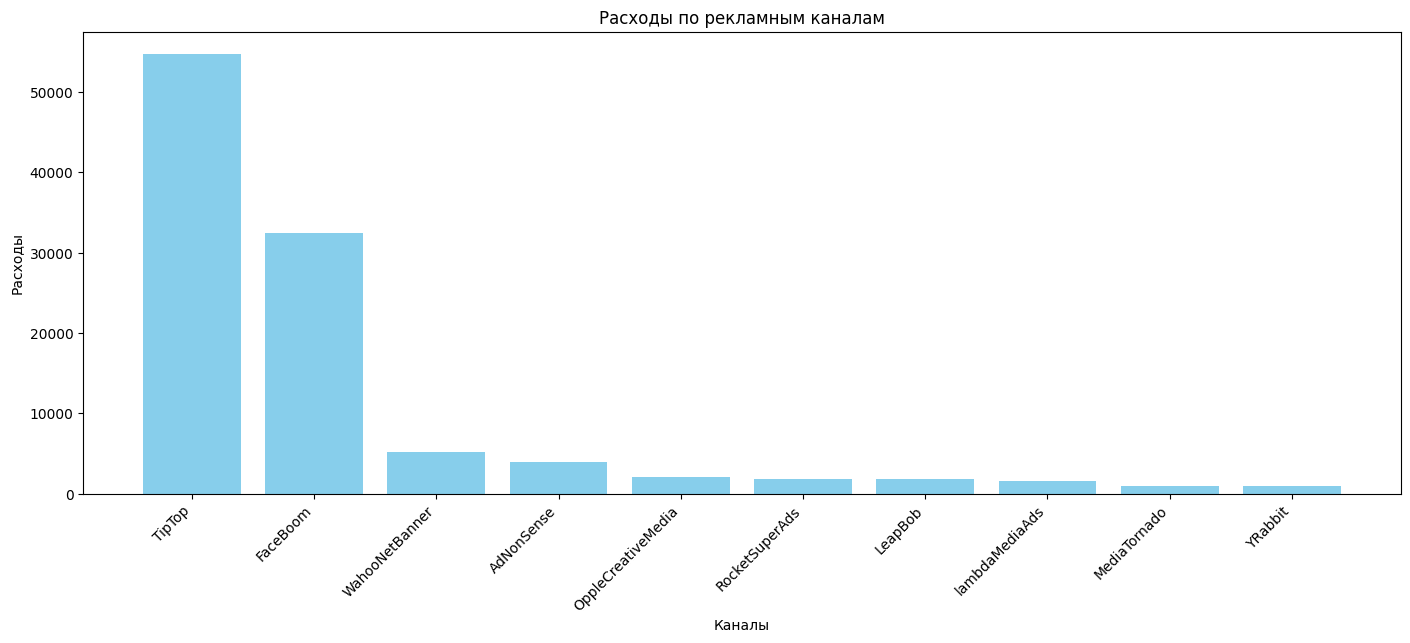

,channel,costs,"share, %"
0,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
2,WahooNetBanner,5151.00,4.88
3,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
6,LeapBob,1797.60,1.70
7,lambdaMediaAds,1557.60,1.48
8,MediaTornado,954.48,0.90
9,YRabbit,944.22,0.90


In [42]:
df_pivot = costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False).reset_index()

plt.figure(figsize=(17, 6))
plt.bar(df_pivot['channel'], df_pivot['costs'], color='skyblue')
plt.title('Расходы по рекламным каналам')
plt.xlabel('Каналы')
plt.ylabel('Расходы')
plt.xticks(rotation=45, ha='right')
plt.show()


df_pivot['share, %'] = ((df_pivot['costs'] / df_pivot['costs'].sum()) * 100).round(2)
df_pivot 

Согласно таблице распределения трат по рекаламным источникам наибольшая доля расходов уходит на рекламу в TipTop, на втором и третьем местах: FaceBoom и WahooNetBanner соответственно. Реклама в YRabbit занимает последнюю строчку в таблице.

#### Построим график с визуализацией динамики изменения расходов по неделям по каждому источнику. 

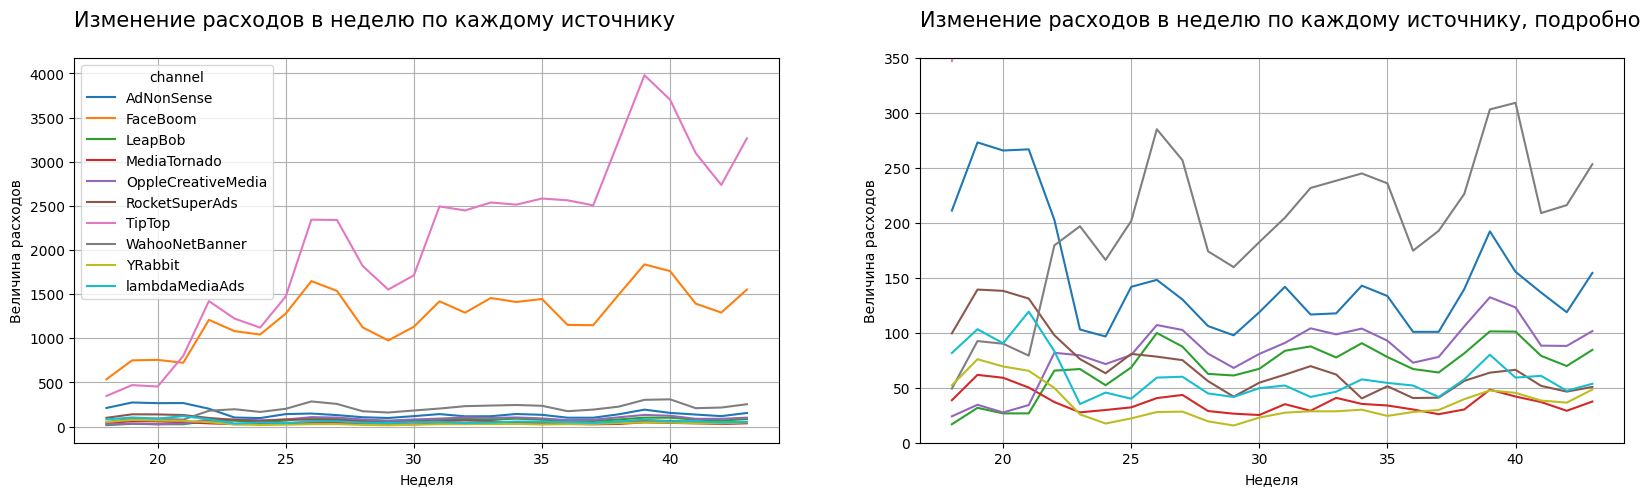

In [43]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
    ).plot(grid=True, ax=ax1)
plt.title('Изменение расходов в неделю по каждому источнику' + "\n", fontsize=15,loc='left')
plt.ylabel('Величина расходов')
plt.xlabel('Неделя')

ax2 = plt.subplot(1, 2, 2)
costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
    ).plot(grid=True, ax=ax2, legend=False)
plt.title('Изменение расходов в неделю по каждому источнику, подробно' + "\n", fontsize=15,loc='left')
plt.ylabel('Величина расходов')
plt.xlabel('Неделя')
plt.ylim(0, 350)
plt.show()

Выделяются TipTop и FaceBoom как два основных источника расходов рекламных средств. Виден всплекс сезонных трендов: это конец весны - 20 неделя, начало лета - 24 неделя, и 36 неделя, сентябрь - дети идут в школу. На 39 неделю, в сентябре, недельные затраты на TipTp достигли 4000, на FaceBomm - 1800.  Замыкает тройку лидеров - WahooNetBanner, траты на который достигли 300, но их размер меньше лидера трат лидера в 13 раз.

#### Построим график с визуализацией динамики изменения расходов по месяцам по каждому источнику.

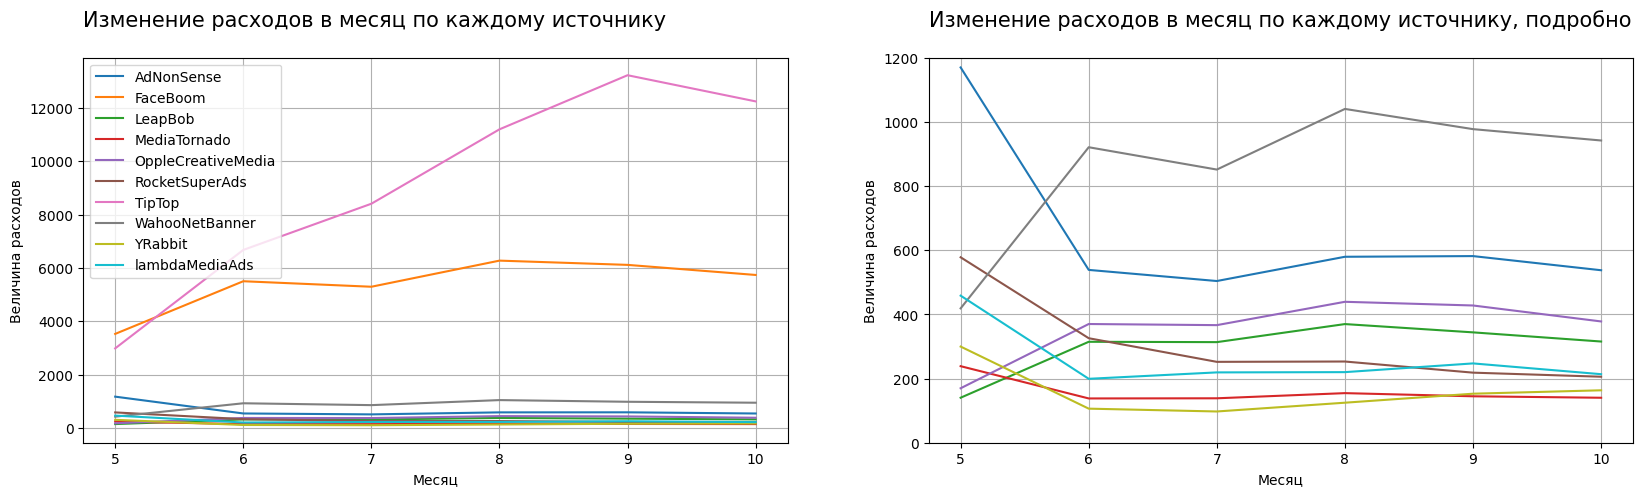

In [44]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
    ).plot(grid=True, ax=ax1)
ax1.legend(loc='upper left')
plt.title('Изменение расходов в месяц по каждому источнику' + "\n", fontsize=15,loc='left')
plt.ylabel('Величина расходов')
plt.xlabel('Месяц')

ax2 = plt.subplot(1, 2, 2)
costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
    ).plot(grid=True, ax=ax2, legend=False)
plt.title('Изменение расходов в месяц по каждому источнику, подробно' + "\n", fontsize=15,loc='left')
plt.ylabel('Величина расходов')
plt.xlabel('Месяц')
plt.ylim(0, 1200)
plt.show()

Ситуация сходна с аналогичным расходами по неделям. В отрыве от остальных источников находятся TipTop и FaceBoom. В конце августа траты на рекламу в месячном выражении в сети TipTop достигла более 13000, а в сети FaceBoom - 6000. Причём средний расход в остальных источниках порядка 500.

#### Выясним, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [45]:
# найдём среднюю стоимость привлечения пользователя по источникам

cac_mean = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc=['mean', 'sum', 'count'])
       .rename(columns={'mean': 'CAC', 'sum':'total_cost', 'acquisition_cost':''})
      ).sort_values(by='CAC', ascending=False)
cac_mean = cac_mean.reset_index()
cac_mean

,channel,CAC,total_cost,count
,,,,
0,TipTop,2.799003,54751.30,19561
1,FaceBoom,1.113286,32445.60,29144
2,AdNonSense,1.008054,3911.25,3880
3,lambdaMediaAds,0.724802,1557.60,2149
4,WahooNetBanner,0.602245,5151.00,8553
5,RocketSuperAds,0.412095,1833.00,4448
6,OppleCreativeMedia,0.250000,2151.25,8605
7,YRabbit,0.218975,944.22,4312
8,MediaTornado,0.218717,954.48,4364


По стоимости привлечения пользователя в лидерах источники TipTop и Faceboom, затраты в этих сетях 2,8 и 1,1 соответственно. На третьем месте AdNonSense. Стоимость привлечения пользователей на остальные источники не превышает единицы. Обращает на себя внимание способность некоторых источников привлекать больше пользователей c меньшим бюджетом. Например, в LeapBob при рекламном бюджете в 1797 удалось привлечь 8553 пользователя, в то время как WahooNetBanner привлекло такое же число пользователей при бюджете в 5151. Это можно использовать для более грамотного распределения средств среди рекламных источников.

In [46]:
# узнаем во сколько раз средняя стоимость привлечения в TipTop больше средней стоимости остальных источников

cac_mean[cac_mean['channel'] == 'TipTop'].CAC/cac_mean[cac_mean['channel'] != 'TipTop'].CAC.mean()

0    5.294073
Name: CAC, dtype: float64

В 5 раз больше стоит привлечение клиента из TipTop, чем из других источников. Стоит проверить так же высок доход этого канала, как и его цена?

#### **Вывод**
TipTop и FaceBoom являются ключевыми источниками расходов на рекламу, с высокими затратами как в недельном, так и месячном контексте. Стоимость привлечения пользователя также наиболее высока у этой пары. Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью. Траты в канале TipTop имеют тенденцию к росту каждый месяц и такая большая цена должна естественным образом компенсироватья в увеличенной прибыли, которую приносит платящий клиент из этого источника. Разберёмся так ли это.


### Оценка окупаемости рекламы

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI и графиков динамики LTV, CAC и ROI

In [47]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()

# горизонт анализа
horizon_days = 14  

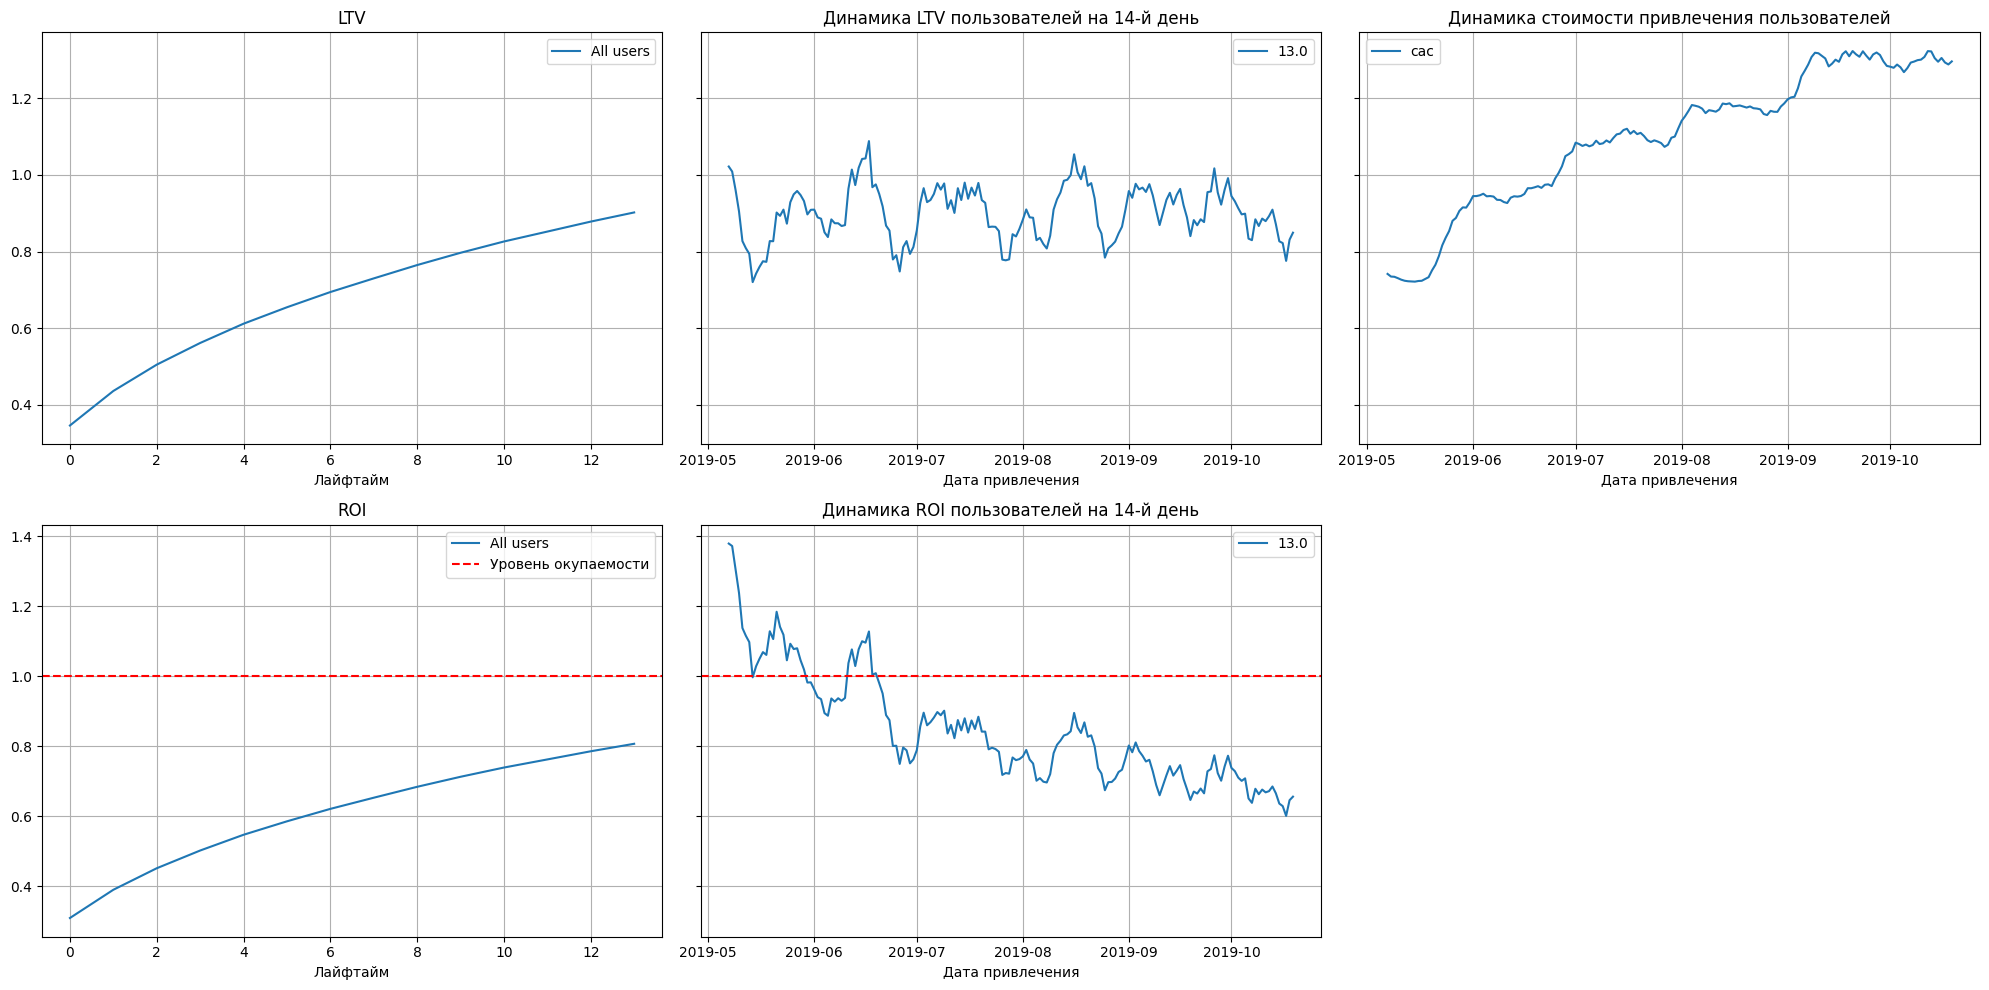

In [48]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Общая картина без разбивки по признакам показывает, что приложение "Procrastinate Pro+" не окупается, т.к. ROI не дотягивает до уровня безубыточности. LTV показывает, что есть доход на каждом лайфтайме, а его динамика на 14 день находится в диапазоне 0,8-1,0. С другой стороны видим сильный рост стоимости затрат на привлечение пользователя и нисходящую динамику ROI на 14-й день после даты привлечения у всех клиентов. Стоит сделать дополнительный анализ окупаемости в разбивке по признакам.

#### Проанализируем конверсию пользователей и динамику её изменения.

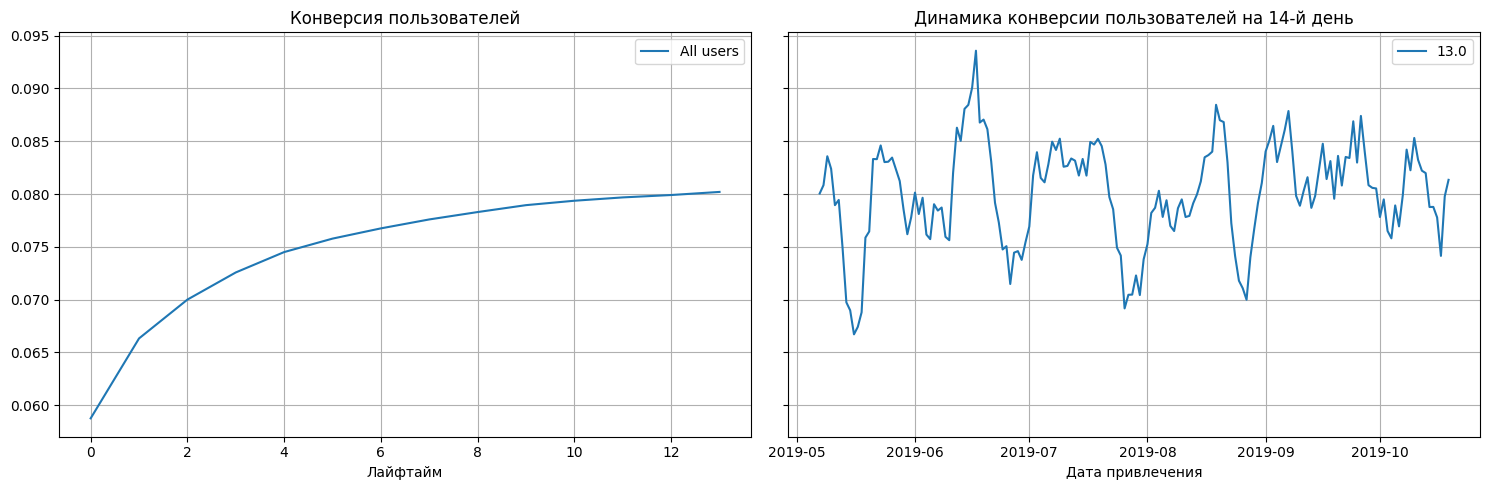

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей и её динамика с учётом сезонных изменений имеют положительную тенденцию. Можно сказать, что здесь всё приемлемо, но есть куда расти. Возможно, стоит поработать над увеличением показателя, на который также имеет влияние удержание пользователей. Для того, чтобы повысить коэффициент конверсии, стоит обратить внимание на следующие моменты:
- улучшение визуального контента;
- оптимизация пользовательского интерфейса;
- тестирование процесса оплаты.

#### Проанализируем удержание пользователей и динамику изменения коэффициента.

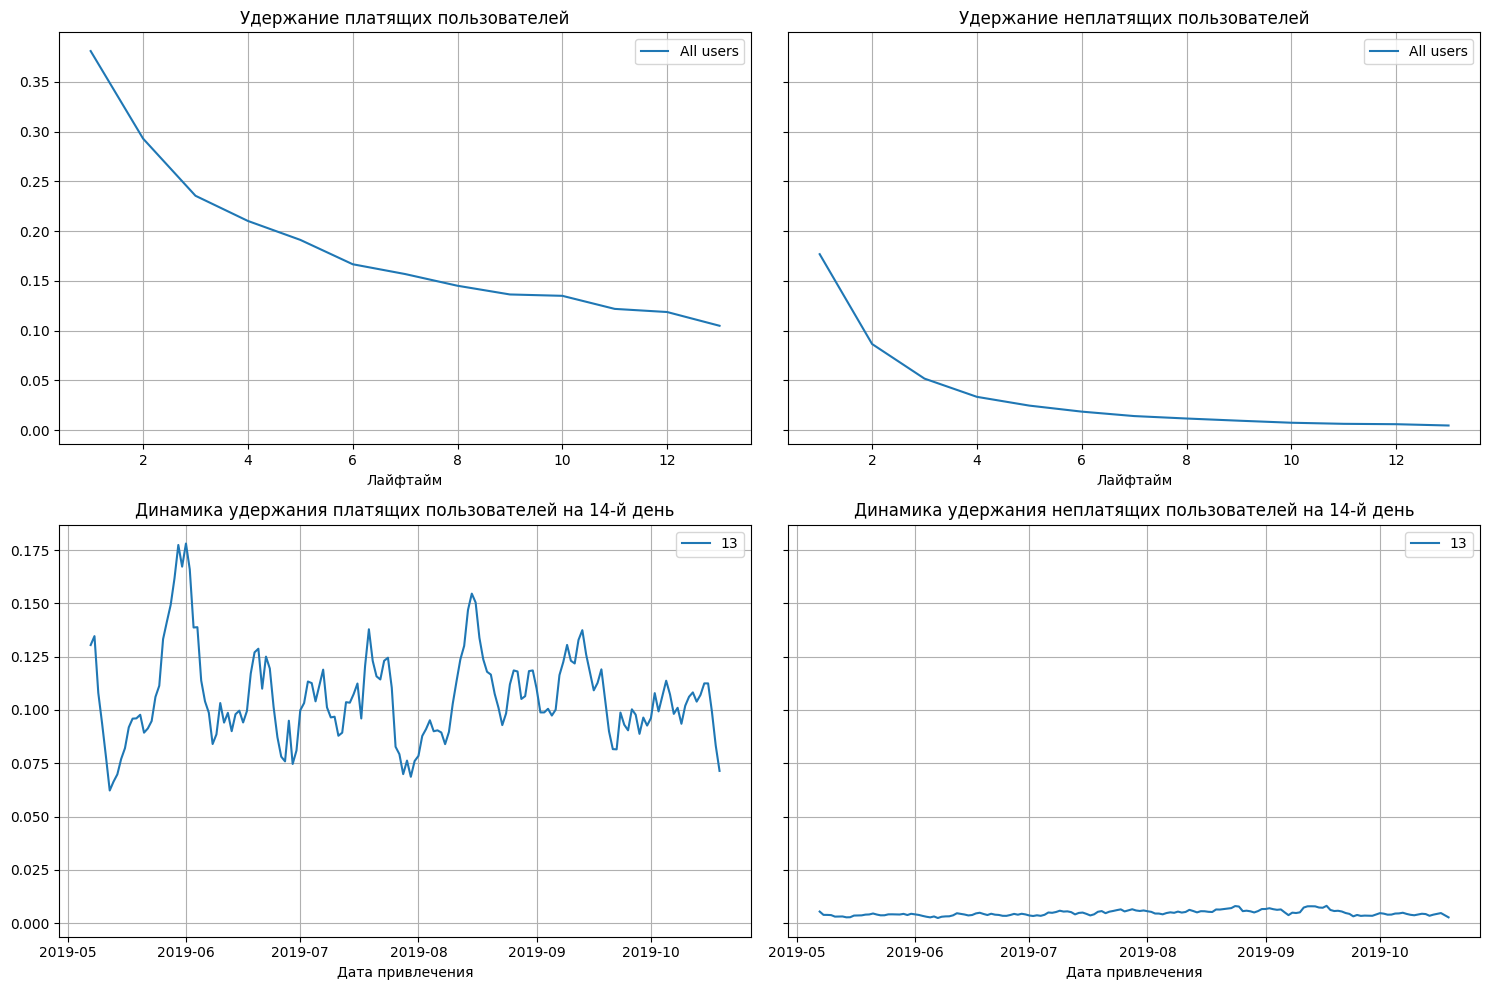

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Динамика удержания не платящих пользователей на конец 2-х недельного срока около нуля, что естественно, т.к. у этой группы низкий уровень мотивации, чтобы продолжать пользоваться приложением. С другой стороны пользователи из этой огромной группы - это потенциальные клиенты, которые могут приносить доход, если правильно заинтересовать продуктом. У платящих пользователей на 14-й день от даты привлечения стабильный, но довольно низкий процент удержания - порядка 10%. Это говорит о том, что есть проблемы с этим параметром. Необходимо обратить внимание на повышение показателя. Для этого могут помочь такие инструменты, как:
- программы лояльности;
- регулярные обновления;
- анализ обратной связи;
- своевременная поддержка;
- возможно стоит решить проблемы технического характера.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

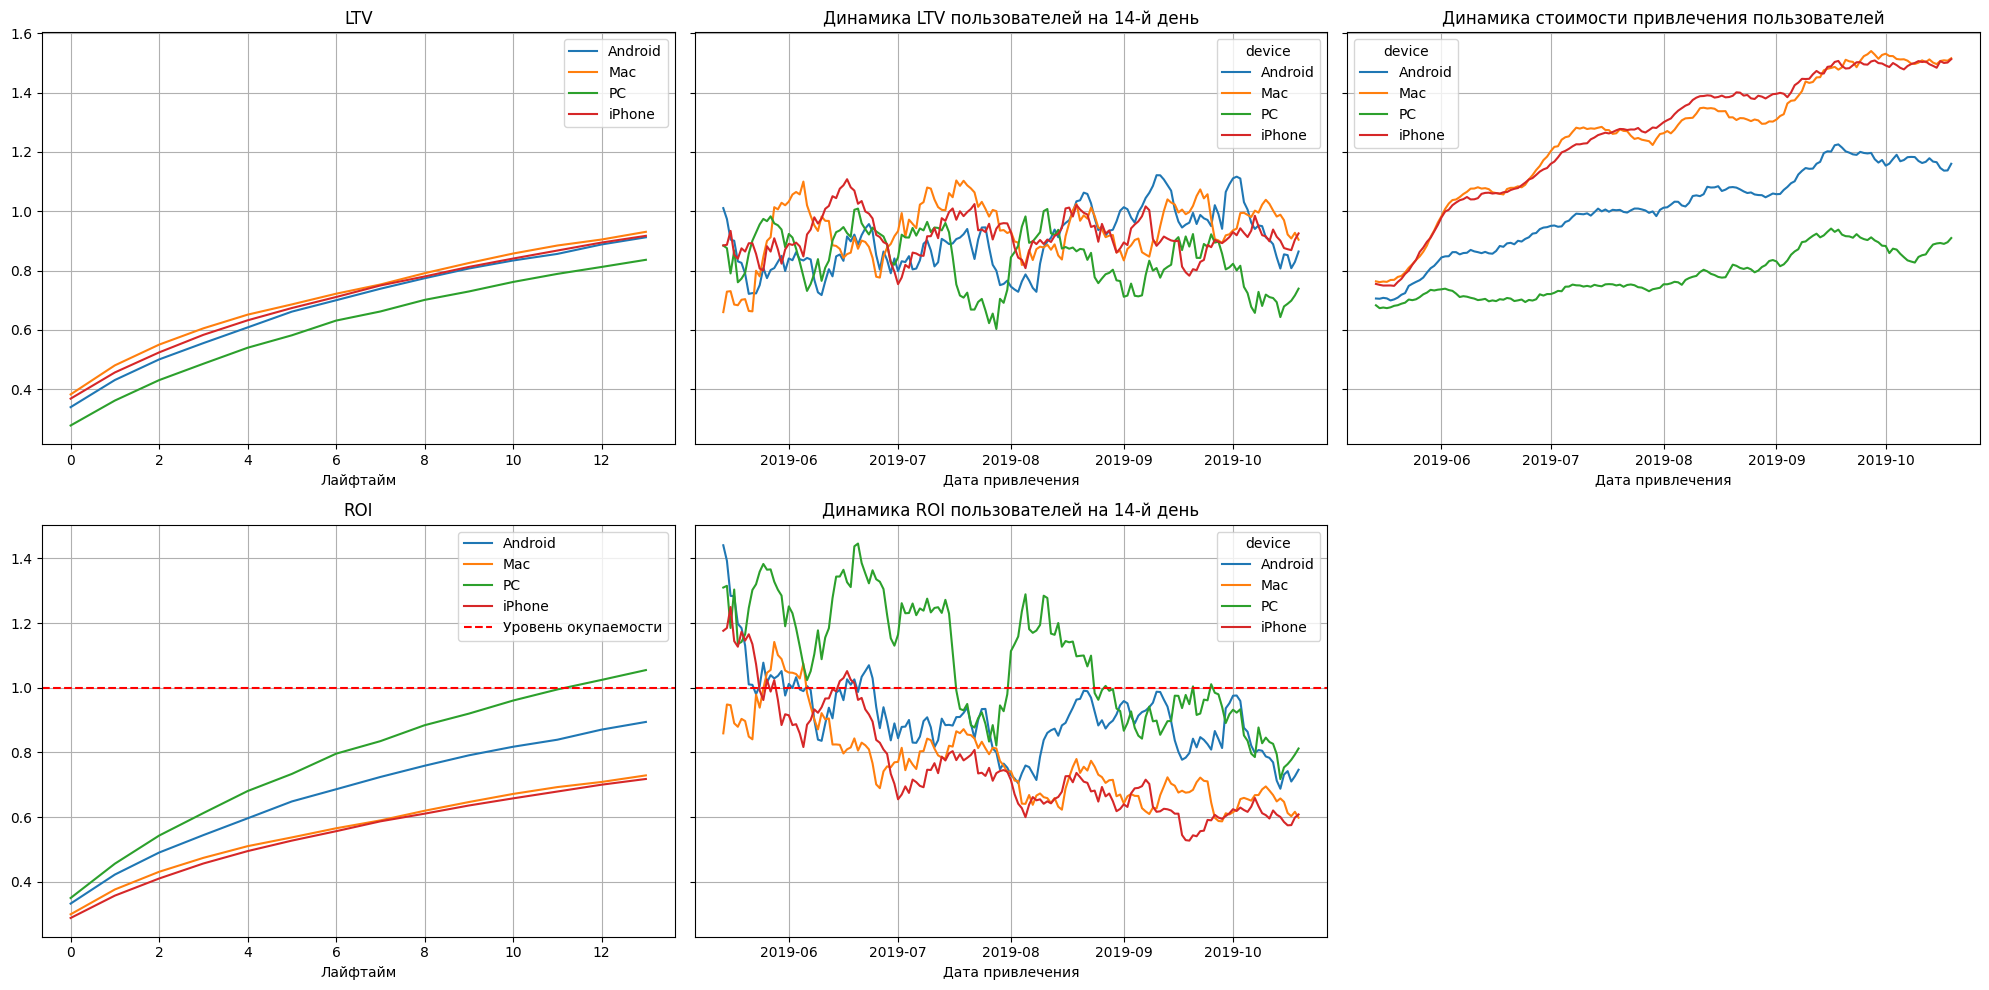

In [51]:
# задаём условие разбивки
dimensions = ['device']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Инвестиции в рекламу сработали только у PC под конец 2 недельного горизонта анализа. Низкий CAC у PC помог выйти этому типу устройств на уровень окупаемости. Наибольшее значение расходов на рекламу мы видим у iPhone и Mac, а их ROI ниже уровня рентабельности инвестиций более чем на 20%. Необходимо оптимизировать параметр CAC как для этих типов устройств, так и для Android. Этого можно достичь с помощью усовершенствования работы с рекламными каналами.

#### Дополнительно проанализируем конверсию (CR) и удержание (RR) пользователей с разбивкой по устройствам

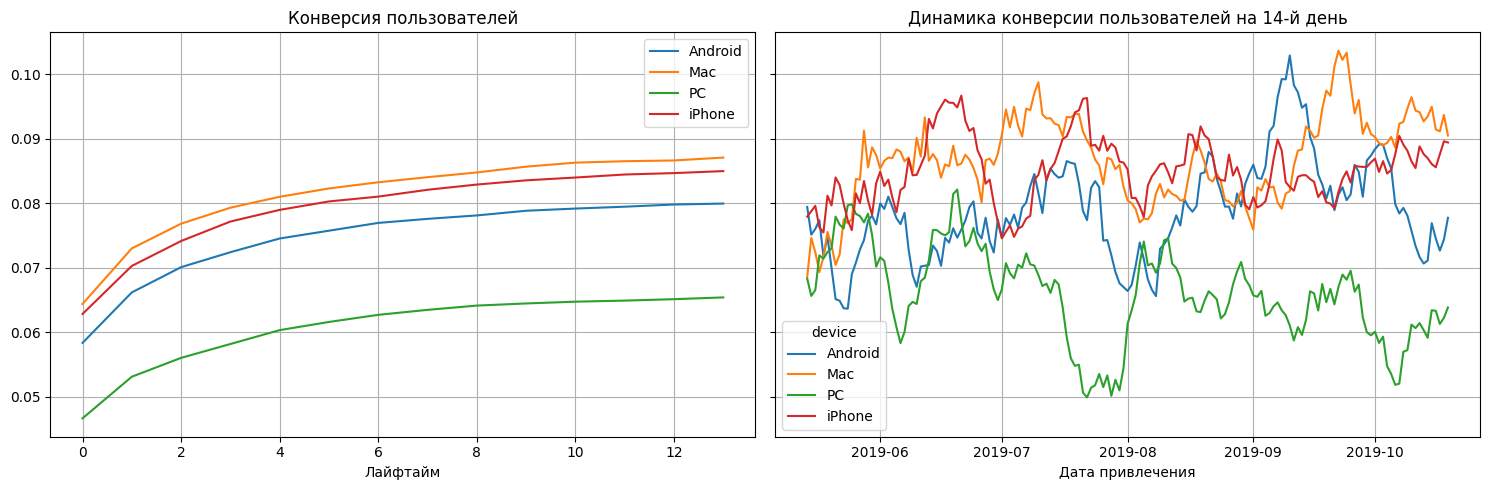

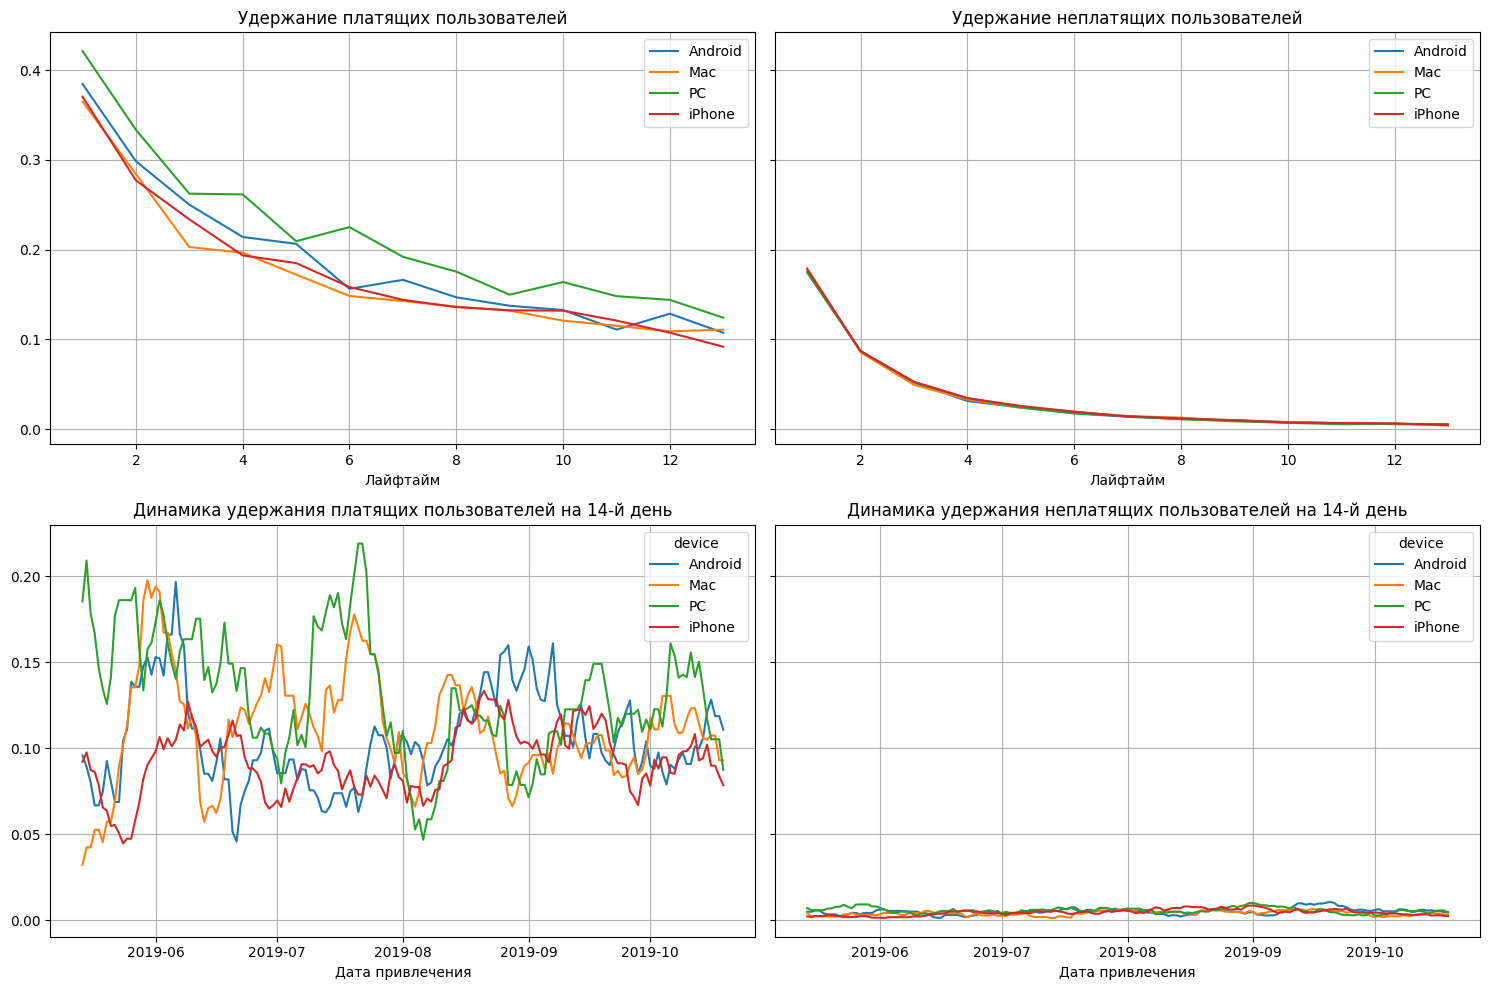

In [52]:
# задаём условие разбивки
dimensions = ['device']

# анализ конверсии и динамики её изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

# анализ удержания и динамики её изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Конверсия и удержание в зависимости от устройств имеют хорошие показатели.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

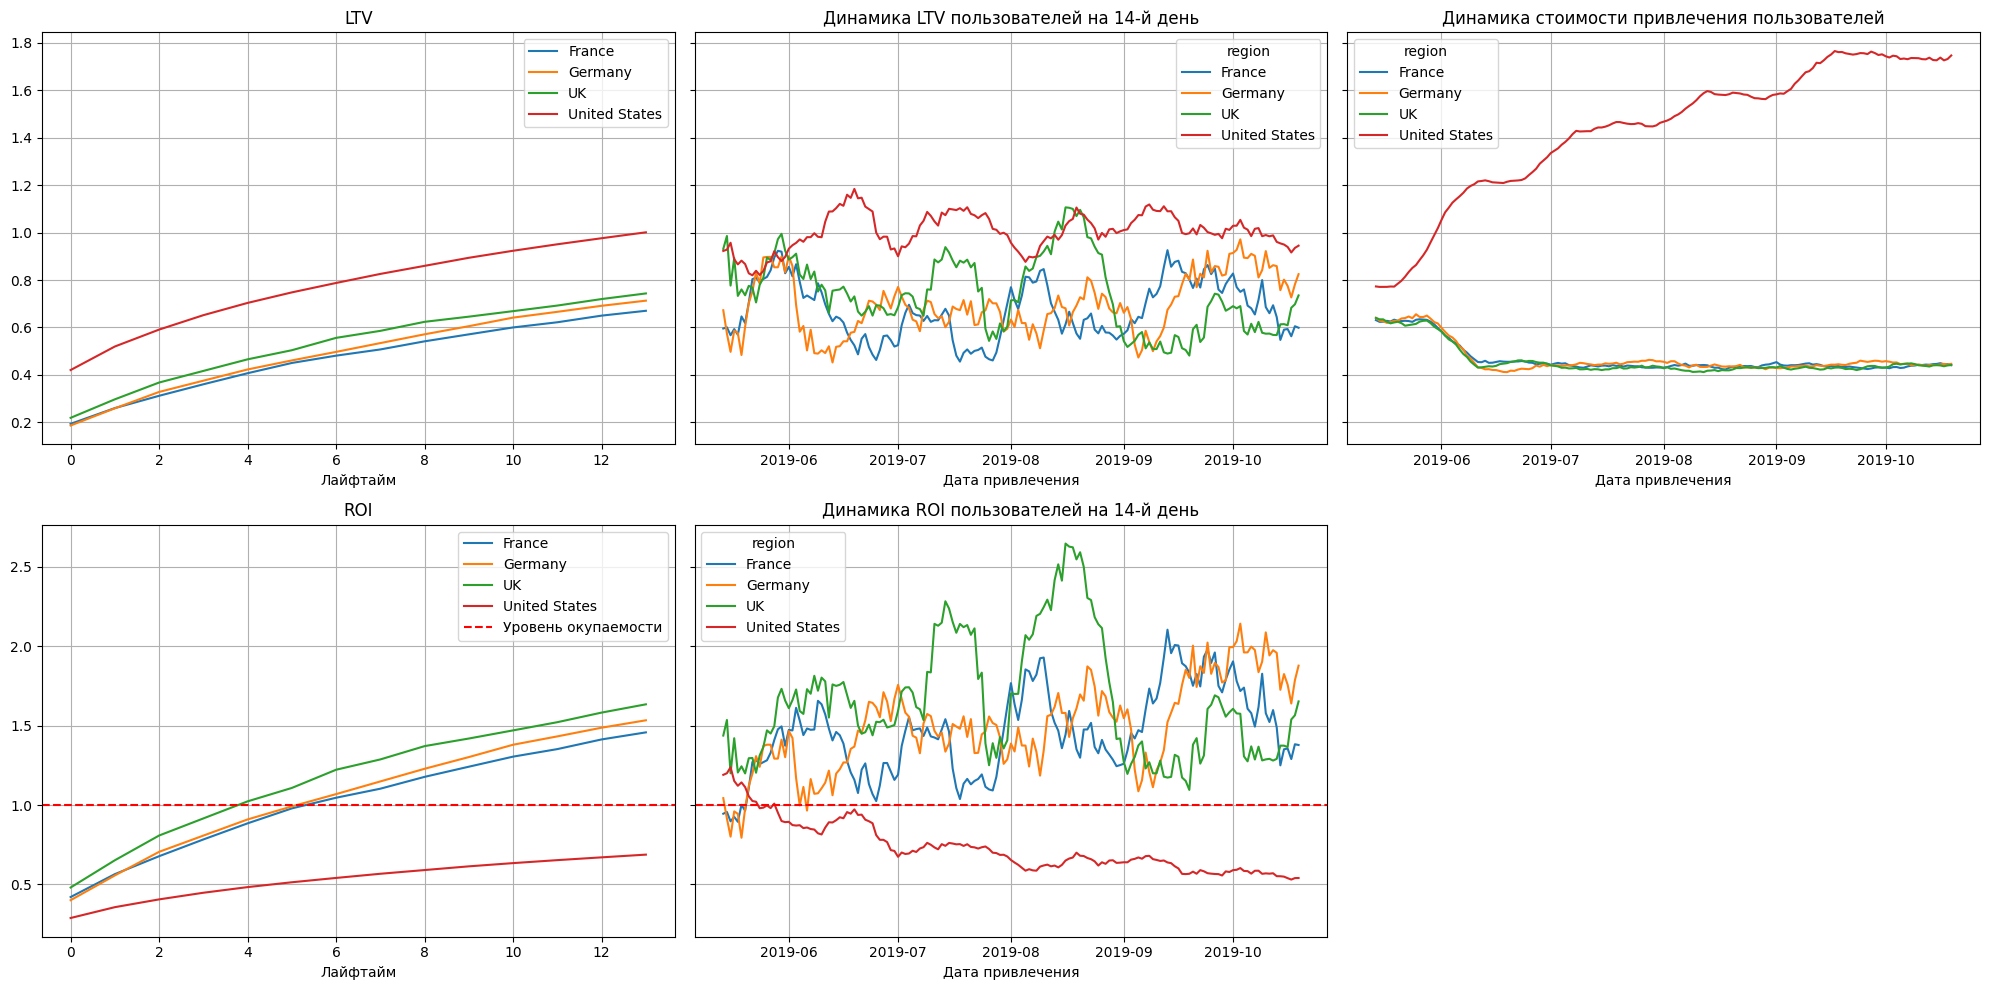

In [53]:
# задаём условие разбивки
dimensions = ['region']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

LTV со стороны американских пользователей показывает отличную динамику, но расходы на рекламу для клиентов из этой страны съедают всю прибыль. В результате ROI - ниже 100%, также ведёт себя и динамика показателя на конец 2-й недели. Реклама не окупается. Пользователи из других стран, наоборот, демонстрируют хороший ROI и низкий CAC, что позволяет уже в первую неделю перешагнуть порог окупаемости. Возможно, стоит пересмотреть политику рекламного бюджета и оптимизировать расходы на пользователей из США с одновременным увеличением их конверсии. Другими словами уменьшить усилия направленные на привлечение новых пользоватлей из США и сосредоточиться на текущих. Как нам известно, доля платящих пользователей в США достаточная большая цифра - 6.9, для сравнения в Германии - 4.11. Поэтому, один из вариантов увеличить стоимость платных услуг для американских клиентов, при сохранении уровня CAC.

#### Дополнительно проанализируем CR и RR пользователей с разбивкой по странам

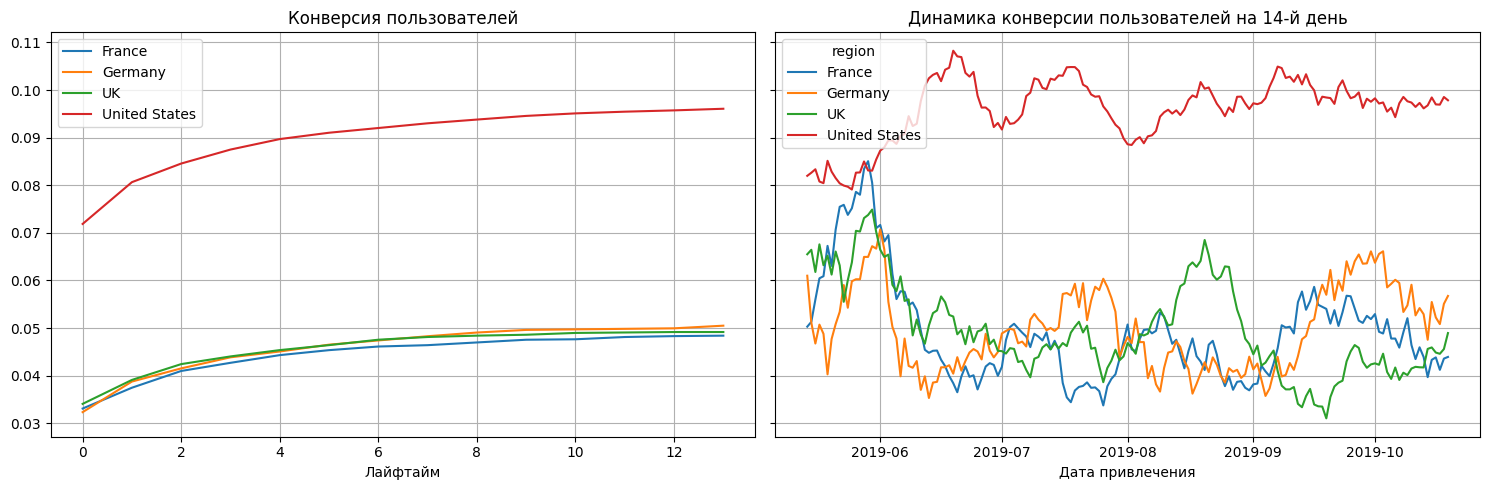

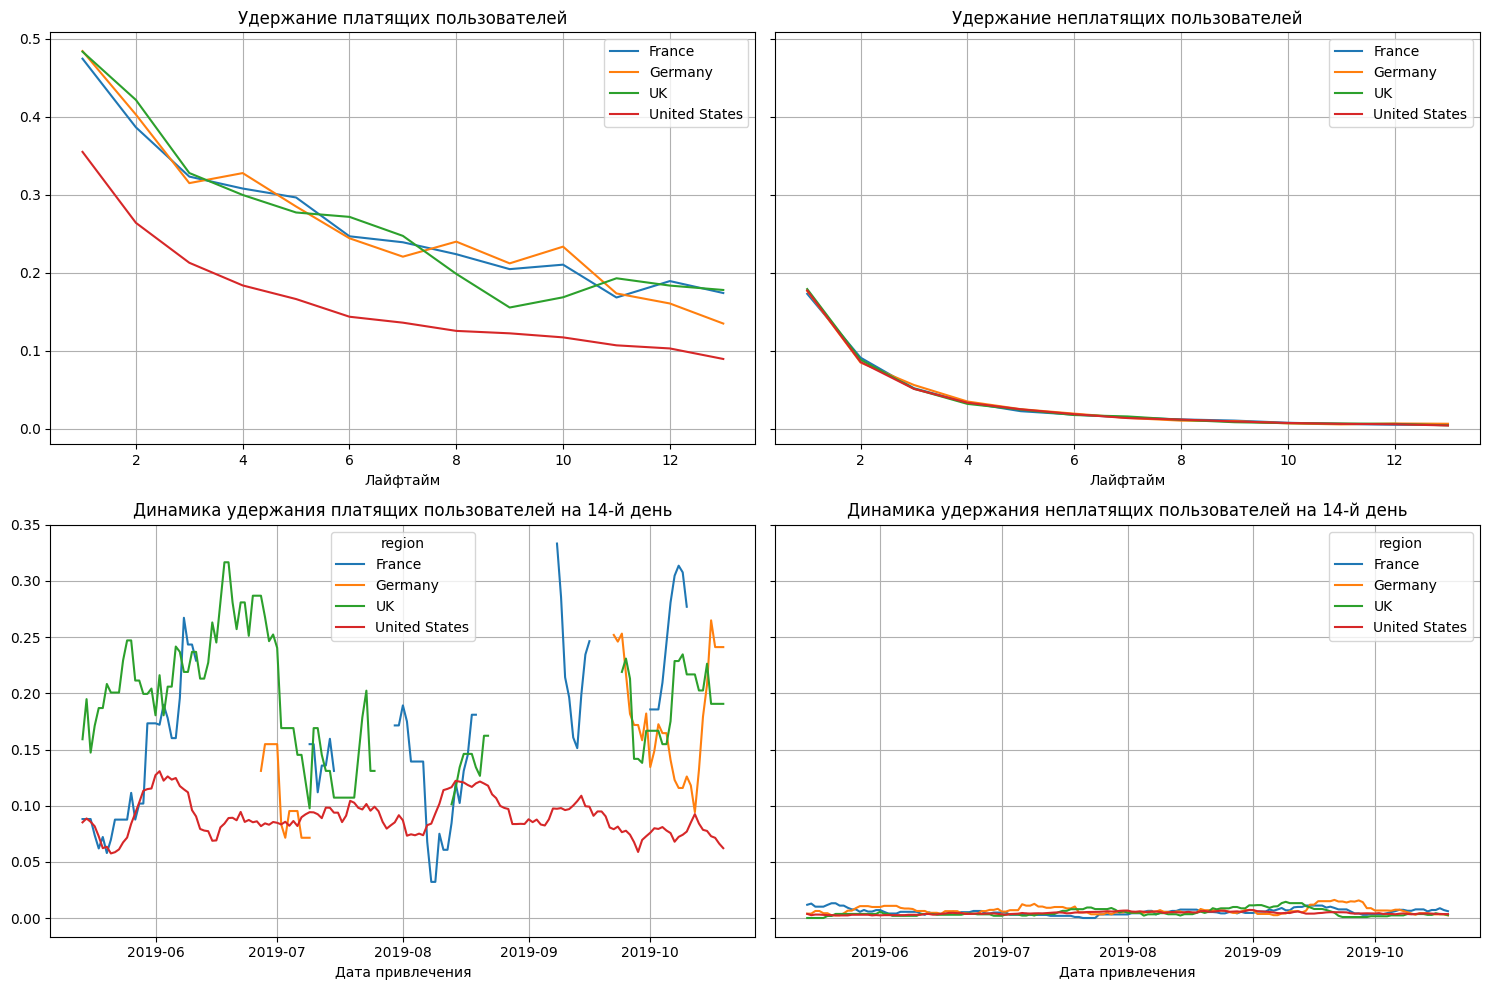

In [54]:
# задаём условие разбивки
dimensions = ['region']

# анализ конверсии и динамики её изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

# анализ удержания и динамики её изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Как мы видим по уровню конверсии пользователей из США и её динамике все усилия отдела маркетинга направлены только на эту страну. При этом удержание уже существующих клиентов оставляет желать лучшего. В отличие от динамики удержания в других странах в США этот показатель составляет в среднем ниже 10% на конец 2-й недели.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

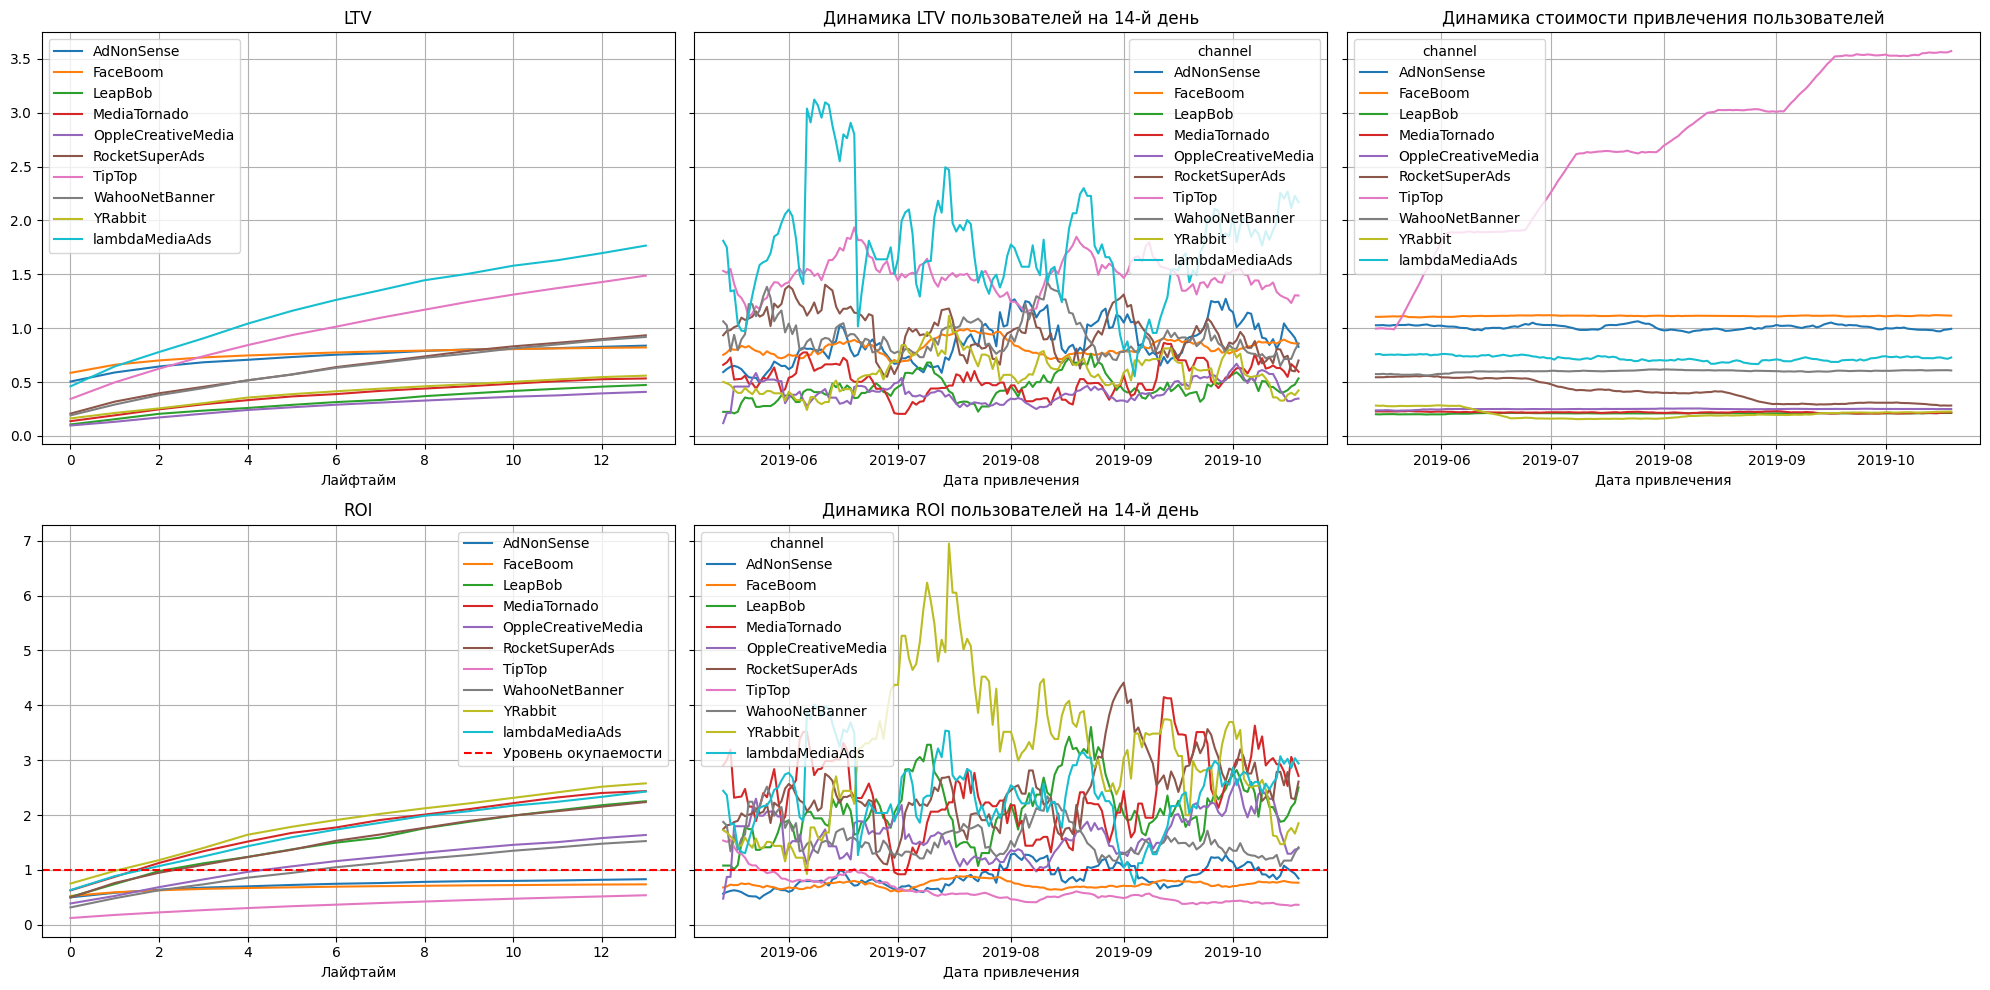

In [55]:
# задаём условие разбивки
dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Такие крупные каналы как TipTop, FaceBoom и AdNonSense не окупаются даже по прошествии двух недель. Как уже было отмечено средняя цена за клиента в TipTop превышает среднюю цену других источников в 5 раз, а прибыли от этого мы не видим, наоборот доход, который приносят другие источники уходит в подобные каналы с раздутым числом клиентов и их низким качеством. Поэтому стоит обратить внимание на другие источники привлечения пользователей, где есть потенциал для роста. Для оставшихся же клиентов возможно увеличение стоимости предоставляемых платных услуг.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>payer</th>
      <th>not_payer</th>
      <th>payer</th>
      <th>payer_%</th>
    </tr>
    <tr>
      <th>channel</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FaceBoom</th>
      <td>25587</td>
      <td>3557</td>
      <td>12.20</td>
    </tr>
    <tr>
      <th>TipTop</th>
      <td>17683</td>
      <td>1878</td>
      <td>9.60</td>
    </tr>
    <tr>
      <th>organic</th>
      <td>55279</td>
      <td>1160</td>
      <td>2.06</td>
    </tr>
    <tr>
      <th>WahooNetBanner</th>
      <td>8100</td>
      <td>453</td>
      <td>5.30</td>
    </tr>
    <tr>
      <th>AdNonSense</th>
      <td>3440</td>
      <td>440</td>
      <td>11.34</td>
    </tr>
    <tr>
      <th>RocketSuperAds</th>
      <td>4096</td>
      <td>352</td>
      <td>7.91</td>
    </tr>
    <tr>
      <th>LeapBob</th>
      <td>8291</td>
      <td>262</td>
      <td>3.06</td>
    </tr>
    <tr>
      <th>OppleCreativeMedia</th>
      <td>8372</td>
      <td>233</td>
      <td>2.71</td>
    </tr>
    <tr>
      <th>lambdaMediaAds</th>
      <td>1924</td>
      <td>225</td>
      <td>10.47</td>
    </tr>
    <tr>
      <th>YRabbit</th>
      <td>4147</td>
      <td>165</td>
      <td>3.83</td>
    </tr>
    <tr>
      <th>MediaTornado</th>
      <td>4208</td>
      <td>156</td>
      <td>3.57</td>
    </tr>
  </tbody>
</table>
</div>

Как мы видим из таблицы процент платящих пользователей в топ-2 рекламных каналов уже довольно высокий, поэтому конвертация будет достаточно сложной. Это ещё раз подтверждает, что стоит обратить внимание на недооценённые источники и попробовать переключить инвестиционные ресурсы на них. Например, на такие каналы как LeapBob, OppleCreativeMedia, YRabbit и MediaTornado.

#### Дополнительно проанализируем CR и RR пользователей с разбивкой по рекламным каналам

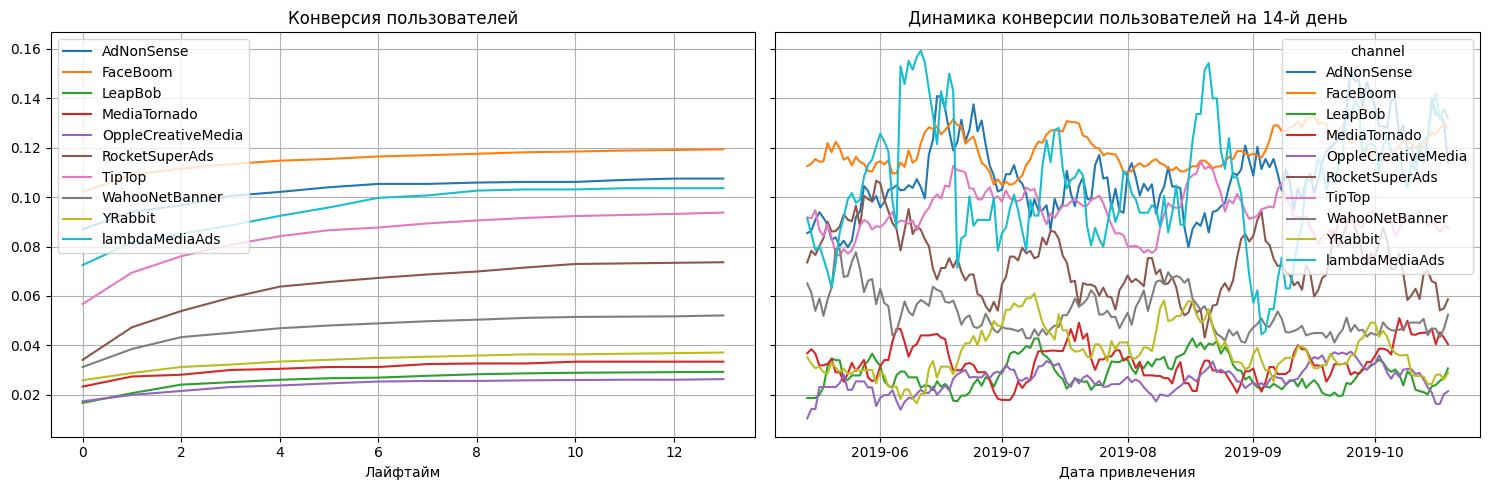

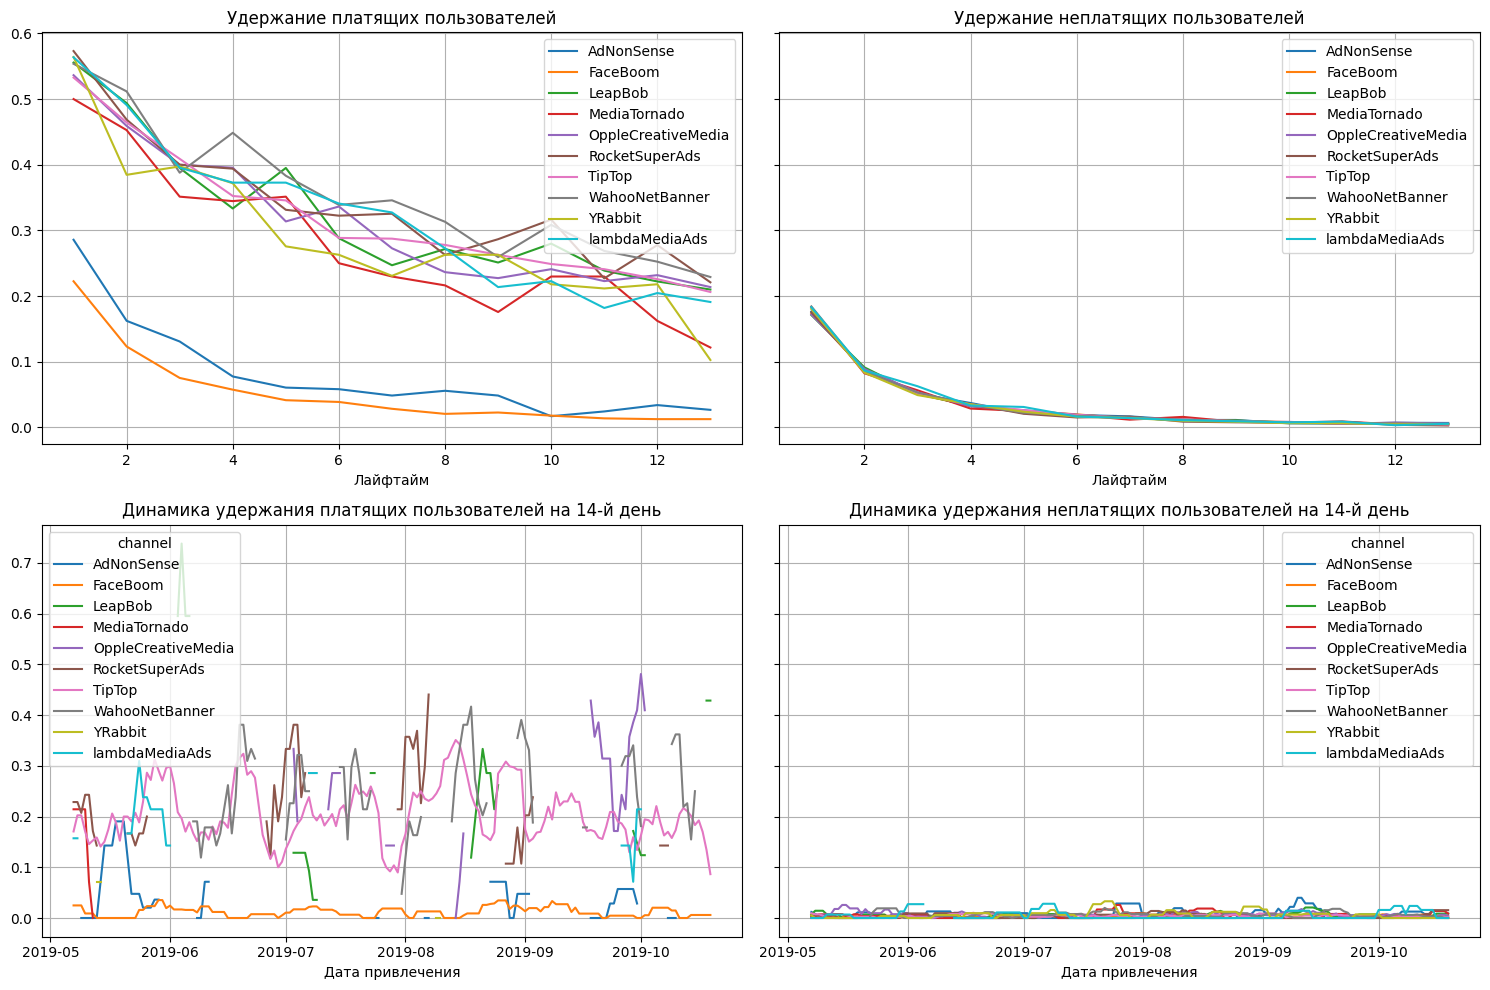

In [56]:
# задаём условие разбивки
dimensions = ['channel']

# анализ конверсии и динамики её изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

# анализ удержания и динамики её изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Ситуация примерно повторяется как и в анализе с разбивкой по другим признакам. Параметры с хорошими показателями конверсии и LTV имеют низкое удержание, низкий ROI или высокую стоимость привлечения. Например, у FaceBoom отличная конверсия, неплохой LTV, даже приемлемый уровень CAC, но это убыточный источник с низким ROI и практически нулевой динамикой удержания, хотя имеет, как мы знаем, самое большое количество пользователей с самой высокой долей платных подписчиков.

#### **Вывод**

Общий анализ показывает, что приложение "Procrastinate Pro+" не окупается из-за низкого ROI. Важными факторами являются рост затрат на привлечение пользователей и недостаточно высокий уровень удержания среди платящих клиентов.  

Можно выделить несколько ключевых моментов:
1. Низкий процент удержания платящих пользователей.
2. Рекламные инвестиции в iPhone и Mac не приносят прибыль, несмотря на высокие затраты.
3. Американские пользователи приносят хороший LTV, но не окупают стоимость их привлечения.
4. Неэффективность крупных каналов TipTop, FaceBoom и AdNonSense.

### Общий итог

Для маркетингового анализа развлекательного приложения Procrastinate Pro+ в наше распоряжение были представлены три датасета:
- visits_info_short.csv — лог сервера с информацией о посещениях сайта,
- orders_info_short.csv — информацию о заказах,
- costs_info_short.csv — информацию о расходах на рекламу.  
Для работы были выбраны: 
- момент анализа - 1 ноября 2019 года
- горизонт анализа - 14 дней  
В ходе обзора и предварительной обработки данных были исправлены названия колонок и изменен тип данных в колонках с датами. Также, мы добавили в данные с расходами на рекламу столбцы с номерами недель и месяцев. Проведена проверка на дубликаты и пропуски, которых не было обнаружено.  
Для выполнения расчётов и визуализации были использованы раннее разработанные функции, которые ускорили работу и помогли сосредоточиться на процессе анализа. Это касается таких параметров как профиль пользователя, коэффициент удержания(RR), коэффициент конверсии(CR), окупаемость инвестиций(ROI), стоимость привлечения клиента(CAC) и доход от пользователя(LTV).  
Исследовательский анализ помог выявить следующие важные данные:
- информация о пользователях была представлена от 1 мая 2019г до 27 октября 2019г;
- клиенты приложения это жители четырёх стран: США, Великобритании, Франции и Германии, причём первых - больше как по общему количеству, так и по доле платящих, чем в остальных странах:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>region</th>
      <th>not_payer</th>
      <th>payer</th>
      <th>payer_%</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>United States</th>
      <td>93100</td>
      <td>6902</td>
      <td>6.90</td>
    </tr>
    <tr>
      <th>UK</th>
      <td>16875</td>
      <td>700</td>
      <td>3.98</td>
    </tr>
    <tr>
      <th>France</th>
      <td>16787</td>
      <td>663</td>
      <td>3.80</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>14365</td>
      <td>616</td>
      <td>4.11</td>
    </tr>
  </tbody>
</table>
</div>

- устройства, с которых предпочитают заходить в приложение: iPhone, устройства на базе Android, Mac и PC. Наибольшее число платящих пользователей используют Mac и iPhone:

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>device</th>
      <th>not_payer</th>
      <th>payer</th>
      <th>payer_%</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>iPhone</th>
      <td>51097</td>
      <td>3382</td>
      <td>6.21</td>
    </tr>
    <tr>
      <th>Android</th>
      <td>32982</td>
      <td>2050</td>
      <td>5.85</td>
    </tr>
    <tr>
      <th>Mac</th>
      <td>28130</td>
      <td>1912</td>
      <td>6.36</td>
    </tr>
    <tr>
      <th>PC</th>
      <td>28918</td>
      <td>1537</td>
      <td>5.05</td>
    </tr>
  </tbody>
</table>
</div>

- существует десять рекламных источников привлечения пользователей, не считая тех, кто пришёл самостоятельно(т.н. "organic"). Тройка лидеров по доле платящих клиентов: FaceBoom, AdNoneSense и lambdaMediaAds. Пользователи пришедшие из органических источников хотя и меют самый низкий уровень платящих, но являются ценным показателем популярности приложения:

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>channel</th>
      <th>not_payer</th>
      <th>payer</th>
      <th>payer_%</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FaceBoom</th>
      <td>25587</td>
      <td>3557</td>
      <td>12.20</td>
    </tr>
    <tr>
      <th>TipTop</th>
      <td>17683</td>
      <td>1878</td>
      <td>9.60</td>
    </tr>
    <tr>
      <th>organic</th>
      <td>55279</td>
      <td>1160</td>
      <td>2.06</td>
    </tr>  
    <tr>
      <th>WahooNetBanner</th>
      <td>8100</td>
      <td>453</td>
      <td>5.30</td>
    </tr>
    <tr>
      <th>AdNonSense</th>
      <td>3440</td>
      <td>440</td>
      <td>11.34</td>
    </tr>
    <tr>
      <th>RocketSuperAds</th>
      <td>4096</td>
      <td>352</td>
      <td>7.91</td>
    </tr>
    <tr>
      <th>LeapBob</th>
      <td>8291</td>
      <td>262</td>
      <td>3.06</td>
    </tr>
    <tr>
      <th>OppleCreativeMedia</th>
      <td>8372</td>
      <td>233</td>
      <td>2.71</td>
    </tr>
    <tr>
      <th>lambdaMediaAds</th>
      <td>1924</td>
      <td>225</td>
      <td>10.47</td>
    </tr>
    <tr>
      <th>YRabbit</th>
      <td>4147</td>
      <td>165</td>
      <td>3.83</td>
    </tr>
    <tr>
      <th>MediaTornado</th>
      <td>4208</td>
      <td>156</td>
      <td>3.57</td>
    </tr>
  </tbody>
</table>
</div>

Маркетинговое исследование  показало, что в тройку лидеров по объёму затрат на рекламу входят такие источники привлечения клиентов как: TipTop (54751.30),  FaceBoom(32445.60) и WahooNetBanner(5151). Реклама в YRabbit(944.22) занимает последнюю строчку таблицы. В затратах заметны сезонные настроения. Это конец весны,  начало лета, начало осени, в сентябре, недельные затраты на TipTp достигли 4000, на FaceBomm - 1800. Стоит обратить внимание, что некоторых рекламные каналы привлекают больше пользователей c меньшим бюджетом. Например, в LeapBob при рекламном бюджете в 1797 удалось привлечь 8553 пользователя, в то время как WahooNetBanner привлекло такое же число пользователей при бюджете в 5151.  
Анализ общей окупаемости рекламы показал, что она совершенно не приносит доход. ROI на 20% ниже уровня безубыточности.  С другой стороны анализ показал, что есть сильный рост стоимости затрат на привлечение пользователя, который достиг цифры в 1.3. Конверсия пользователей показала другую, более приемлемую картину, но всё равно она довольно низкая - 8% на конец второй недели. Удержание пользователей составляет 7.5% на конец второй недели.   
Данные по окупаемости рекламы, конверсии и удержанию пользователей с разбивкой по признакам показали следующие результаты.  
1. **Разбивка по устройствам**.  
Рекламные вложения начали приносить результаты лишь в отношении PC ближе к концу двухнедельного периода анализа. Низкий CAC для PC способствовал достижению уровня окупаемости этой категории устройств. Высокие затраты на рекламу отмечаются для устройств iPhone и Mac, при этом их возврат на инвестиции  оказывается на 20% ниже точки рентабельности. Показатели конверсии и удержания для различных устройств остаются на хорошем уровне.
2. **Разбивка по странам**.  
Рекламные затраты не окупаются. Прибыль от американских пользователей показывает хорошую динамику, но расходы на рекламу для этой аудитории больше. ROI остается ниже 100%, и тенденция сохраняется на конец второй недели. В то же время пользователи из других стран демонстрируют высокий ROI и низкий CAC, что позволяет им окупаться уже в первую неделю. Усилия маркетингового отдела сейчас сосредоточены исключительно на США, и удержание уже существующих клиентов в этой стране оставляет желать лучшего. В отличие от других стран, где уровень удержания выше, в США он составляет менее 10% к концу второй недели.
3. **Разбивка по рекламным каналам**.  
Большие расходы на такие рекламные площадки, как TipTop, FaceBoom и AdNonSense, не оправдывают себя даже через две недели. Средняя стоимость привлечения клиента в TipTop в пять раз выше, чем в других источниках, но это не приносит нам прибыли.  

Рекомендации для отдела маркетинга.
1. Перестать привлекать новых пользователей любой ценой. Необходимо сосредоточиться на текущих клиентах, добиваться большей конверсии. Особенно это касается американского рынка.
2. Европейский рынок имеет огромный потенциал для завоевания аудитории, но он недостаточно представлен, стоит обратить на него внимание при распределении рекламного бюджета.
3. Что касается непосредственно привлечения клиентов, то здесь стоит поработать над анализом воронки продаж. Определить на каких этапах мы теряем потенциальных покупателей.
4. Такие крупные каналы как FaceBoom и TipTop имеют большую стоимость привлечения. Возможно, необходимо использовать другие рекламные площадки, которые могут предоставить более широкие возможности, за меньшую стоимость. Необходимо протестировать их эффективность или найти новые способы привлечения. Здесь пригодятся такие метрики как: CTR, CPC, CPA.
5. Пользователи устройств iPhone и Mac, как правило, имеют больший доход, чем пользователи Android, поэтому для повышения ROI можно рассмотреть повышение LTV через увеличение стоимости платных услуг.
6. Удержание платящих пользователей является, наверное, главным пунктом всего анализа, вне зависимости от разбивки. 
7. Важно регулярно тестировать техническую сторону вопроса на всех устройствах, с которых пользователи заходят в приложение. 